In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from textblob import TextBlob

In [73]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


#EDA on category Offtopic

In [14]:
#frequency of rare words in titles
freq = pd.Series(' '.join(train['titles']).split()).value_counts()[-10:]
freq

BL,              1
finished         1
opinion          1
Post             1
Thread           1
Hot              1
arachnophobic    1
Tell             1
years            1
Friendly         1
dtype: int64

In [44]:
#Removing rare words in titles 
train['titles'] = train['titles'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['titles'].head(50)

0                             adventuring rp 2020-2021!
1                         whats yalls opinion religion?
2                      le château des malheureux (d&dd)
3                                         games playing
4                                     help! description
5                                       struggle within
6              character personalities and/or dynamics?
7                               hot take: subs. readers
8                    random disputable cheese (post #2)
9                         reject webtoon, embrace n k e
10                        birthday dad’s birthday today
11                             think amazon jeff bezos?
12                                            listening
13                                      meme drop hot 🎤
14                                       movie watching
15                              watercooler: place chat
16                         friendly reminder give fudge
17                   tell overcome writersblock 

Advanced Text Processing

In [4]:
train = pd.read_csv(r'C:\Users\vishn\Desktop\tapas csv files\tapas-csv.csv')

In [5]:
train_new = train[train['titles'].notnull()]

In [6]:
train.head(13000)

,Unnamed: 0,titles,replies,views,category
0,0,The Two Other Species (Novel),0,39,Announcements
1,1,"“Lanche”, a textless comic [one-shot]",39,49,Announcements
2,2,Moon Violations Unit - Episode 1 complete,0,104,Announcements
3,3,"Introducing Lauren, Community Marketing Intern",49,334,Announcements
4,4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,4,238,Announcements
...,...,...,...,...,...
12995,974,Where to begin?,5,427,Writing|Novels
12996,975,Novels vs Series on Tapas,84,435,Writing|Novels
12997,976,Espaço para escritores brasileiros,22,362,Writing|Novels
12998,977,Anyone else writing Fantasy Mystery / Monster ...,191,323,Writing|Novels


In [46]:
#Counting no of words in every title of this category
train['word_count'] = train['titles'].apply(lambda x: len(str(x).split(" ")))
train[['titles','word_count']].head(50)

,titles,word_count
0,The Two Other Species (Novel),5
1,"“Lanche”, a textless comic [one-shot]",5
2,Moon Violations Unit - Episode 1 complete,7
3,"Introducing Lauren, Community Marketing Intern",5
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,7
5,Tapas Media & Kakao Entertainment,5
6,A Tapas tutorial on how to share some love,9
7,"📢 Tapas Stickers on Instagram, Twitter, and Ti...",12
8,"Introducing Tapastry, the Tapas Creator Commun...",7
9,Want your oc in my comic (CLOSED) MIGHT DO IT ...,13


In [58]:
#No of characters in each title
train['char_count'] = train['titles'].str.len() ## this also includes spaces
train[['titles','char_count']].head(50)

,titles,char_count
0,The Two Other Species (Novel),29.0
1,"“Lanche”, a textless comic [one-shot]",37.0
2,Moon Violations Unit - Episode 1 complete,41.0
3,"Introducing Lauren, Community Marketing Intern",46.0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,41.0
5,Tapas Media & Kakao Entertainment,33.0
6,A Tapas tutorial on how to share some love,42.0
7,"📢 Tapas Stickers on Instagram, Twitter, and Ti...",68.0
8,"Introducing Tapastry, the Tapas Creator Commun...",51.0
9,Want your oc in my comic (CLOSED) MIGHT DO IT ...,58.0


In [60]:
#Calculating average word length of each title
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

train_new['avg_word'] = train_new['titles'].apply(lambda x: avg_word(x))
train_new[['titles','avg_word']].head(50)

<ipython-input-60-f6789e6eda2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['avg_word'] = train_new['titles'].apply(lambda x: avg_word(x))


,titles,avg_word
0,The Two Other Species (Novel),5.000000
1,"“Lanche”, a textless comic [one-shot]",6.600000
2,Moon Violations Unit - Episode 1 complete,5.000000
3,"Introducing Lauren, Community Marketing Intern",8.400000
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,5.000000
5,Tapas Media & Kakao Entertainment,5.800000
6,A Tapas tutorial on how to share some love,3.777778
7,"📢 Tapas Stickers on Instagram, Twitter, and Ti...",4.750000
8,"Introducing Tapastry, the Tapas Creator Commun...",6.428571
9,Want your oc in my comic (CLOSED) MIGHT DO IT ...,3.538462


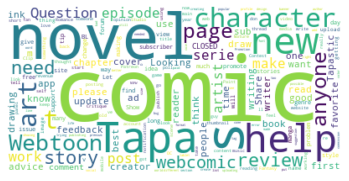

In [61]:
#making a wordcloud of the titles of all the categories

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud

#Importing Dataset

#Creating the text variable

text2 = " ".join(title for title in train_new.titles)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

In [70]:
#calculating stopwords in each title
stop = stopwords.words('english')

train_new['stopwords'] = train_new['titles'].apply(lambda x: len([x for x in x.split() if x in stop]))
train_new[['titles','stopwords']].head(13000)

,titles,stopwords
0,The Two Other Species (Novel),0
1,"“Lanche”, a textless comic [one-shot]",1
2,Moon Violations Unit - Episode 1 complete,0
3,"Introducing Lauren, Community Marketing Intern",0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,1
...,...,...
12995,Where to begin?,1
12996,Novels vs Series on Tapas,1
12997,Espaço para escritores brasileiros,0
12998,Anyone else writing Fantasy Mystery / Monster ...,2


In [73]:
#calculating exclamations in each title
train_new['Exclamations'] = train_new['titles'].apply(lambda x: len([x for x in x.split() if x.endswith('!')]))
train_new[['titles','Exclamations']].head(13000)

,titles,Exclamations
0,The Two Other Species (Novel),0
1,"“Lanche”, a textless comic [one-shot]",0
2,Moon Violations Unit - Episode 1 complete,0
3,"Introducing Lauren, Community Marketing Intern",0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,0
...,...,...
12995,Where to begin?,0
12996,Novels vs Series on Tapas,0
12997,Espaço para escritores brasileiros,0
12998,Anyone else writing Fantasy Mystery / Monster ...,0


In [74]:
#no of numerics in titles
train_new['numerics'] = train_new['titles'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train_new[['titles','numerics']].head(13000)

,titles,numerics
0,The Two Other Species (Novel),0
1,"“Lanche”, a textless comic [one-shot]",0
2,Moon Violations Unit - Episode 1 complete,1
3,"Introducing Lauren, Community Marketing Intern",0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,0
...,...,...
12995,Where to begin?,0
12996,Novels vs Series on Tapas,0
12997,Espaço para escritores brasileiros,0
12998,Anyone else writing Fantasy Mystery / Monster ...,0


In [75]:
#no of uppercase words in titles
train_new['upper'] = train_new['titles'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train_new[['titles','upper']].head(13000)

,titles,upper
0,The Two Other Species (Novel),0
1,"“Lanche”, a textless comic [one-shot]",0
2,Moon Violations Unit - Episode 1 complete,0
3,"Introducing Lauren, Community Marketing Intern",0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,0
...,...,...
12995,Where to begin?,0
12996,Novels vs Series on Tapas,0
12997,Espaço para escritores brasileiros,0
12998,Anyone else writing Fantasy Mystery / Monster ...,0


In [10]:
#transforming titles into lowercase
train_new['titles'] = train_new['titles'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_new['titles'].head(13000)

<ipython-input-10-686bcf4b6411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['titles'] = train_new['titles'].apply(lambda x: " ".join(x.lower() for x in x.split()))


0                            the two other species (novel)
1                    “lanche”, a textless comic [one-shot]
2                moon violations unit - episode 1 complete
3           introducing lauren, community marketing intern
4                ✨⁠ tapas milestone assets for creators ✨⁠
                               ...                        
12995                                      where to begin?
12996                            novels vs series on tapas
12997                   espaço para escritores brasileiros
12998    anyone else writing fantasy mystery / monster ...
12999    what’s your novel like? (advertise with your i...
Name: titles, Length: 13000, dtype: object

In [11]:
#remove stopwrds from titles
from nltk.corpus import stopwords
stop = stopwords.words('english')
train_new['titles'] = train_new['titles'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train_new['titles'].head(13000)

<ipython-input-11-457639508189>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['titles'] = train_new['titles'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0                                      two species (novel)
1                      “lanche”, textless comic [one-shot]
2                moon violations unit - episode 1 complete
3           introducing lauren, community marketing intern
4                    ✨⁠ tapas milestone assets creators ✨⁠
                               ...                        
12995                                               begin?
12996                               novels vs series tapas
12997                   espaço para escritores brasileiros
12998    anyone else writing fantasy mystery / monster ...
12999            what’s novel like? (advertise influences)
Name: titles, Length: 13000, dtype: object

In [28]:
freq = pd.Series(' '.join(train_new['titles']).split()).value_counts()[:10]
freq

comic        1596
novel         595
tapa          469
new           459
help          371
comic?        365
anyone        351
character     343
art           342
need          342
dtype: int64

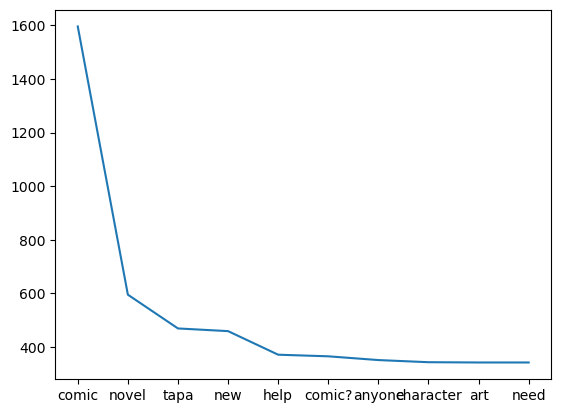

In [29]:
#top 10 frequently repeated words
p = plt.plot(freq.index, freq.values)

In [27]:
#lemnitization
from textblob import Word
train_new['titles'] = train_new['titles'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train_new['titles'].head(50)

<ipython-input-27-26bcdb8ae52d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['titles'] = train_new['titles'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


0                                    two specie (novel)
1                   “lanche”, textless comic [one-shot]
2              moon violation unit - episode 1 complete
3        introducing lauren, community marketing intern
4                    ✨⁠ tapa milestone asset creator ✨⁠
5                     tapa medium & kakao entertainment
6                              tapa tutorial share love
7     📢 tapa sticker instagram, twitter, tiktok! 🌟 i...
8        introducing tapastry, tapa creator community 🆕
9                   want oc comic (closed) might tho ;)
10                 feature chance women’s history month
11                        ✨ new tapa dashboard update ✨
12    industry news: congratulation alice - heartsto...
13                      hey creators! need suggestions!
14                      new episode infinite kid posted
15                         2021 cartoonist studio prize
16                         supporting black storyteller
17                    100% revenue book cover cr

In [39]:
TextBlob(train_new['titles'][50]).ngrams(2)

[WordList(['tapastic', 'update']),
 WordList(['update', 'creator']),
 WordList(['creator', 'notification']),
 WordList(['notification', 'update'])]

In [40]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)


In [41]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()  

In [43]:
def cleanReviews(documents):
    cleanedReviews = []
    for document in documents:
        s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
        s = re.sub('\s+',' ', s)
        s = str(s).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        #tokens = [word for word in tokens if word not in ['alexa', 'echo', 'dot']]
        review = ' '.join(tokens)
        cleanedReviews.append(review)
    return(cleanedReviews)

In [45]:
def textTrends(documents):
    cleanedReviews = cleanReviews(documents)
    plotNgrams(cleanedReviews)

In [49]:
data = pd.read_csv(r'C:\Users\vishn\Desktop\tapas csv files\tapas-csv.csv')
data.head()

,Unnamed: 0,titles,replies,views,category
0,0,The Two Other Species (Novel),0,39,Announcements
1,1,"“Lanche”, a textless comic [one-shot]",39,49,Announcements
2,2,Moon Violations Unit - Episode 1 complete,0,104,Announcements
3,3,"Introducing Lauren, Community Marketing Intern",49,334,Announcements
4,4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,4,238,Announcements


In [52]:
posReviews = data[data['views'] > str(100)]
negReviews = data[data['views'] < str(100)]

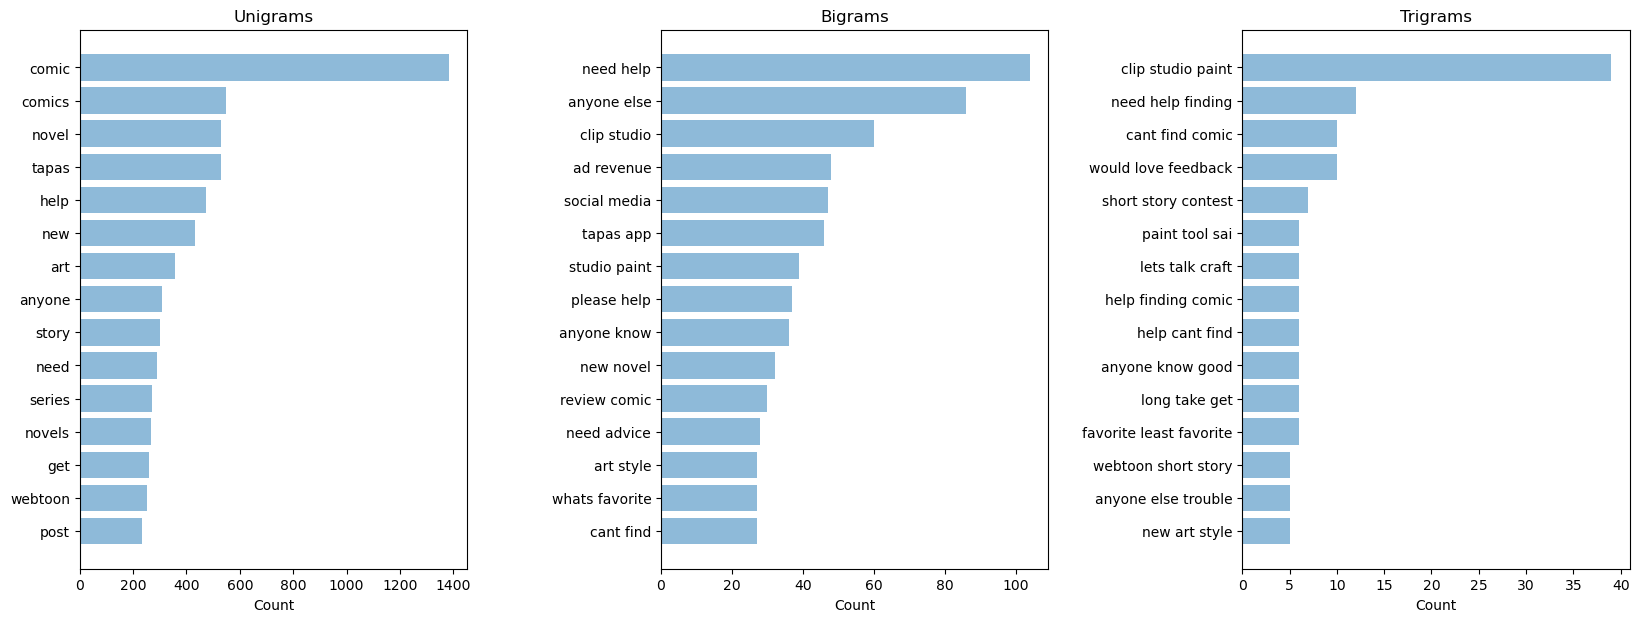

In [53]:
textTrends(posReviews['titles'])

In [54]:
posReviews = data[data['replies'] == str(0)]
negReviews = data[data['replies'] == str(0)]

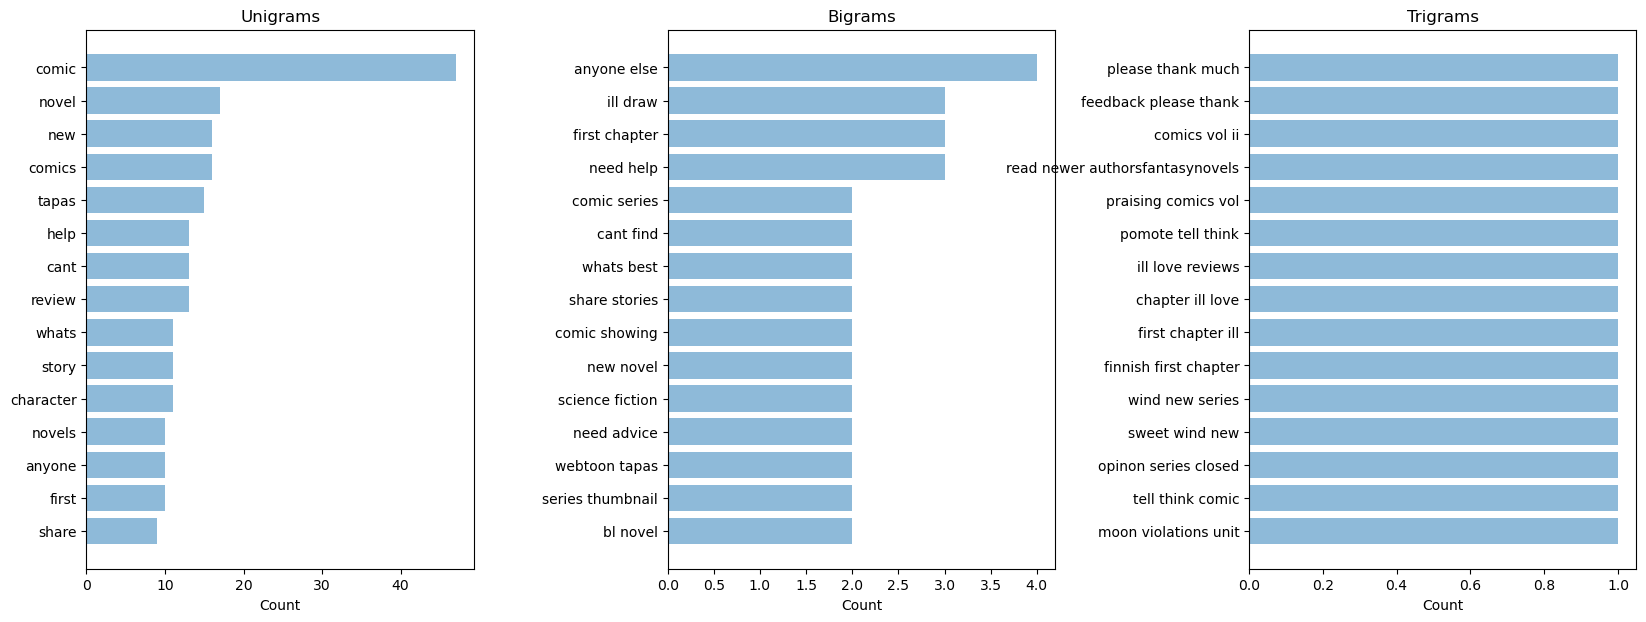

In [55]:
textTrends(posReviews['titles'])

In [56]:
#sentiment-analyis of the titles
train_new['sentiment'] = train_new['titles'].apply(lambda x: TextBlob(x).sentiment[0] )
train_new[['titles','sentiment']].head(50)

<ipython-input-56-360026b7565c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['sentiment'] = train_new['titles'].apply(lambda x: TextBlob(x).sentiment[0] )


,titles,sentiment
0,two specie (novel),0.000000
1,"“lanche”, textless comic [one-shot]",0.250000
2,moon violation unit - episode 1 complete,0.100000
3,"introducing lauren, community marketing intern",0.000000
4,✨⁠ tapa milestone asset creator ✨⁠,0.000000
5,tapa medium & kakao entertainment,0.000000
6,tapa tutorial share love,0.500000
7,"📢 tapa sticker instagram, twitter, tiktok! 🌟 i...",0.000000
8,"introducing tapastry, tapa creator community 🆕",0.000000
9,want oc comic (closed) might tho ;),0.133333


In [69]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
train_new_vect = tfidf.fit_transform(train_new['titles'])

print(train_new_vect)
print(train_new_vect.todense())
#print(TfidfVectorizer.get_feature_names())

  (0, 554)	1.0
  (1, 779)	0.9429303633332556
  (1, 159)	0.3329899846905526
  (2, 170)	0.8482370073506116
  (2, 274)	0.5296168231475266
  (3, 506)	0.7657437654653313
  (3, 168)	0.6431457732512712
  (4, 203)	0.5693766646293115
  (4, 521)	0.6877520336184065
  (4, 867)	0.45034137499162435
  (5, 514)	0.8296840458852401
  (5, 867)	0.5582332702405857
  (6, 496)	0.5353876211090428
  (6, 773)	0.43596637661145665
  (6, 913)	0.6212287009013001
  (6, 867)	0.3706323175385013
  (7, 354)	0.5468724156754307
  (7, 428)	0.3881112469314919
  (7, 915)	0.46975692508178846
  (7, 434)	0.48542016188506926
  (7, 867)	0.30658753848090037
  (8, 203)	0.5572913923797026
  (8, 867)	0.4407826795618068
  (8, 168)	0.7036596715584926
  (9, 144)	0.5245222912716704
  :	:
  (13335, 806)	0.785510155777651
  (13335, 867)	0.4686445572516379
  (13335, 554)	0.404160950771579
  (13336, 792)	0.6857237348725389
  (13336, 215)	0.6221899122154835
  (13336, 545)	0.37770712538916323
  (13337, 677)	0.8532321252169671
  (13337, 824)	0.

In [65]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_new_bow = bow.fit_transform(train_new['titles'])
print(train_new_bow)

  (0, 909)	1
  (0, 548)	1
  (1, 166)	1
  (1, 565)	1
  (1, 769)	1
  (2, 269)	1
  (2, 176)	1
  (3, 174)	1
  (4, 853)	1
  (4, 513)	1
  (4, 203)	1
  (5, 853)	1
  (5, 506)	1
  (6, 853)	1
  (6, 906)	1
  (6, 763)	1
  (6, 487)	1
  (7, 853)	1
  (7, 425)	1
  (7, 908)	1
  (7, 420)	1
  (7, 349)	1
  (8, 174)	1
  (8, 853)	1
  (8, 203)	1
  :	:
  (13336, 537)	1
  (13336, 213)	1
  (13336, 785)	1
  (13336, 343)	1
  (13337, 815)	1
  (13337, 673)	1
  (13338, 552)	1
  (13338, 33)	1
  (13338, 288)	1
  (13339, 92)	1
  (13339, 720)	1
  (13340, 169)	1
  (13340, 293)	1
  (13341, 978)	1
  (13341, 193)	1
  (13341, 856)	1
  (13342, 851)	1
  (13342, 456)	1
  (13342, 989)	1
  (13343, 853)	1
  (13343, 98)	1
  (13343, 682)	1
  (13343, 970)	1
  (13344, 548)	1
  (13344, 125)	1
